In [48]:
from datasets import load_dataset

#dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

dataset = load_dataset("wikitext", "wikitext-103-raw-v1")

train_text = dataset["train"]["text"]

In [49]:
train_text[4]

" The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for series newcomers . Character designer Raita Honjou and composer Hitoshi Sakimoto both returned from previous entries , along with Valkyria Chronicles II director Takeshi Ozawa . A large team of writers handled the script . The game 's opening theme was sung by May 'n . \n"

In [50]:

from tokenizers import Tokenizer
from tokenizers.models import Unigram
from tokenizers.trainers import UnigramTrainer
from tokenizers.pre_tokenizers import Whitespace

tokenizer = Tokenizer(Unigram())
tokenizer.pre_tokenizer = Whitespace()

trainer = UnigramTrainer(
    vocab_size=30000,
    special_tokens=["[PAD]", "[CLS]", "[SEP]", "[MASK]"]
)

print("Training Unigram tokenizer...")
tokenizer.train_from_iterator(train_text, trainer)
print("Training complete.")


PAD_TOKEN = "[PAD]"
PAD_ID = tokenizer.token_to_id(PAD_TOKEN)

tokenizer.enable_padding(
    pad_id=PAD_ID,
    pad_token=PAD_TOKEN
)

tokenizer.enable_truncation(
    max_length=512
)

Training Unigram tokenizer...


Training complete.


In [51]:
def batch_iterator(texts, batch_size=1024):
    batch = []
    for line in texts:
        if line.strip():
            batch.append(line)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

In [52]:
from tqdm import tqdm
import torch

i = 0

for batch in tqdm(batch_iterator(train_text, batch_size=1024)):

    encoded = tokenizer.encode_batch(batch)

    token_ids = [e.ids for e in encoded]
    attention_masks = [e.attention_mask for e in encoded]

    if i < 20:
        print(encoded)
        print(token_ids)
        print(attention_masks)

    input_ids = torch.tensor(token_ids)
    attn_mask = torch.tensor(attention_masks)

    i += 1

0it [00:00, ?it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

2it [00:00,  2.60it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

3it [00:01,  3.04it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_

In [53]:
print(encoded[3].ids)

[1748, 4443, 11, 9, 10, 3061, 6, 2191, 15, 232, 401, 6, 113, 110, 24, 21720, 11, 84, 7, 394, 12, 167, 775, 8, 26, 256, 23, 4, 611, 2114, 550, 22, 2006, 7, 4, 7, 1172, 29, 119, 278, 423, 23, 4, 1743, 17, 11, 550, 9, 10, 45, 138, 15, 17285, 561, 1178, 8, 525, 4580, 953, 4, 1497, 11, 9, 10, 5, 7940, 6, 2191, 14, 25, 14, 190, 11, 801, 1300, 2898, 21, 3429, 1571, 741, 1745, 448, 98, 5, 561, 1178, 15, 3061, 8, 3945, 8531, 620, 83, 8, 13951, 132, 11, 5, 194, 12, 477, 953, 4, 121, 5, 1178, 86, 5658, 13, 1118, 11, 3412, 5, 501, 15, 7, 86, 792, 458, 6, 871, 24, 30, 6, 20, 42, 9, 23, 4, 3698, 29, 49, 4, 9, 10, 321, 10, 17, 14, 25, 14, 5, 14, 25, 14, 2631, 14254, 4, 9, 10, 4034, 4, 13, 3656, 4, 6, 5, 790, 1010, 28, 226, 709, 5257, 10, 17, 54, 653, 13, 41, 16, 9, 49, 4, 88, 1580, 5, 1606, 7, 4, 1633, 11, 9, 10, 100, 5, 6233, 4, 15, 5, 3778, 4, 6981, 20, 8, 6191, 64, 226, 171, 15, 5, 208, 11734, 3296, 7, 9, 5, 6407, 15861, 6356, 2453, 238, 617, 12573, 21, 6, 2191, 8, 26, 610, 23, 4, 2758, 2680, 1351

In [54]:
print(encoded[3].tokens)

['Production', 'relocate', 'd', 't', 'o', 'Cleveland', ',', 'Ohio', 'in', 'August', '2011', ',', 'where', 'film', 'ing', 'transpire', 'd', 'over', 'a', 'period', 'of', 'four', 'weeks', '.', 'The', 'city', "'", 's', 'East', '9th', 'Street', 'was', 'chosen', 'a', 's', 'a', 'double', 'for', 'New', 'York', 'City', "'", 's', '42', 'n', 'd', 'Street', 't', 'o', 'be', 'used', 'in', 'climactic', 'battle', 'scenes', '.', 'Army', 'Reserve', 'soldier', 's', 'assigne', 'd', 't', 'o', 'the', 'Columbus', ',', 'Ohio', '@', '-', '@', 'base', 'd', '39', '1st', 'Militar', 'y', 'Police', 'Battalion', 'provided', 'background', 'action', 'during', 'the', 'battle', 'scenes', 'in', 'Cleveland', '.', 'Staff', 'Sergeant', 'Michael', 'T', '.', 'Landis', 'state', 'd', 'the', 'use', 'of', 'real', 'soldier', 's', 'made', 'the', 'scenes', 'more', 'realistic', 'and', 'helpe', 'd', 'portray', 'the', 'military', 'in', 'a', 'more', 'positive', 'light', ',', 'explain', 'ing', 'that', ',', '"', 'I', 't', "'", 's', 'easy'

In [55]:
print(encoded[4].ids)

[7476, 5270, 1292, 11, 15, 119, 278, 423, 6, 113, 110, 24, 1317, 11, 84, 69, 425, 8, 6191, 773, 4, 15, 119, 278, 423, 312, 518, 1751, 13, 1285, 518, 8, 387, 1178, 854, 171, 15, 4036, 6, 1756, 523, 4, 8785, 6164, 4653, 734, 4684, 3680, 29, 84, 112, 425, 9, 10, 194, 7, 4, 1745, 2734, 4, 6, 16, 3856, 7, 9, 24, 30, 36, 247, 3158, 22, 9, 10, 20, 506, 7, 4, 300, 4684, 160, 15, 7, 4, 820, 29, 5, 1041, 9, 10, 4, 16, 16, 5, 1727, 22839, 4, 6, 5, 369, 1787, 24, 3660, 6, 105, 64, 479, 3118, 30, 5, 523, 4, 160, 622, 17, 23, 9, 704, 9, 10, 10, 1865, 2493, 11, 20, 8, 20, 164, 16, 23, 27, 16, 506, 9, 24, 300, 890, 7, 9, 479, 621, 28, 1865, 14, 25, 14, 2493, 11, 2039, 4, 6, 20, 4653, 871, 16, 11, 6, 20, 52, 148, 18, 4, 17, 10, 4246, 29, 1611, 31, 7, 477, 1113, 13, 2532, 259, 393, 877, 8, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [56]:
print(encoded[4].tokens)

['Principal', 'photography', 'conclude', 'd', 'in', 'New', 'York', 'City', ',', 'where', 'film', 'ing', 'occurre', 'd', 'over', 'two', 'days', '.', 'Filming', 'location', 's', 'in', 'New', 'York', 'City', 'included', 'Park', 'Avenue', 'and', 'Central', 'Park', '.', 'For', 'scenes', 'taking', 'place', 'in', 'Manhattan', ',', 'visual', 'effect', 's', 'supervisor', 'Jake', 'Morrison', 'shot', 'aerial', 'footage', 'for', 'over', 'three', 'days', 't', 'o', 'use', 'a', 's', 'background', 'plate', 's', ',', 'e', 'labor', 'a', 't', 'ing', 'that', 'his', 'main', 'objective', 'was', 't', 'o', '"', 'get', 'a', 's', 'much', 'aerial', 'work', 'in', 'a', 's', 'possible', 'for', 'the', 'audience', 't', 'o', 's', 'e', 'e', 'the', 'big', 'expanse', 's', ',', 'the', 'wide', 'establish', 'ing', 'shots', ',', 'while', 'also', 'making', 'sure', 'that', 'the', 'effect', 's', 'work', 'does', 'n', "'", 't', 'look', 't', 'o', 'o', 'computer', 'generate', 'd', '"', '.', '"', 'W', 'e', "'", 'r', 'e', 'get', 't',

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        assert d_model % n_heads == 0

        self.d_model = d_model
        self.n_heads = n_heads
        self.d_head = d_model // n_heads

        self.qkv = nn.Linear(d_model, 3 * d_model)
        self.out = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape

        # Project to Q, K, V
        qkv = self.qkv(x)                       # (B, T, 3D)
        q, k, v = qkv.chunk(3, dim=-1)

        # Split heads
        q = q.view(B, T, self.n_heads, self.d_head).transpose(1, 2)
        k = k.view(B, T, self.n_heads, self.d_head).transpose(1, 2)
        v = v.view(B, T, self.n_heads, self.d_head).transpose(1, 2)

        # Scaled dot-product attention
        scores = (q @ k.transpose(-2, -1)) / (self.d_head ** 0.5)
        # scores: (B, heads, T, T)

        # ----- INLINE CAUSAL MASK -----
        # Create upper-triangular mask
        causal_mask = torch.triu(
            torch.ones(T, T, device=x.device),
            diagonal=1
        )

        # Apply mask BEFORE softmax
        scores = scores.masked_fill(causal_mask == 1, float('-inf'))
        # --------------------------------

        attn = F.softmax(scores, dim=-1)
        out = attn @ v                          # (B, heads, T, d_head)

        # Merge heads
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        return self.out(out)


In [59]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.GELU(),
            nn.Linear(d_ff, d_model)
        )

    def forward(self, x):
        return self.net(x)


In [60]:
class DecoderBlock(nn.Module):
    def __init__(self, d_model, n_heads, d_ff):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, n_heads)
        self.ff = FeedForward(d_model, d_ff)

        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.ff(self.ln2(x))
        return x


In [61]:
class DecoderTransformer(nn.Module):
    def __init__(
        self,
        vocab_size,
        max_len,
        d_model,
        n_heads,
        d_ff,
        n_layers
    ):
        super().__init__()

        self.token_emb = nn.Embedding(vocab_size, d_model)
        self.pos_emb = nn.Embedding(max_len, d_model)

        self.layers = nn.ModuleList([
            DecoderBlock(d_model, n_heads, d_ff)
            for _ in range(n_layers)
        ])

        self.ln_f = nn.LayerNorm(d_model)
        self.head = nn.Linear(d_model, vocab_size)

    def forward(self, input_ids, attention_mask=None):
        B, T = input_ids.shape

        positions = torch.arange(T)
        x = self.token_emb(input_ids) + self.pos_emb(positions)

        for layer in self.layers:
            x = layer(x)

        x = self.ln_f(x)
        logits = self.head(x)    # (B, T, vocab_size)
        return logits

In [62]:
model_one = DecoderTransformer(vocab_size=tokenizer.get_vocab_size(),max_len = 512,d_model=126,n_heads=6,d_ff=1024,n_layers=2)

In [63]:
optimizer = torch.optim.Adam(model_one.parameters(),lr=0.1)

In [64]:
loss_fn = nn.CrossEntropyLoss(ignore_index=PAD_ID)

In [65]:
from tqdm.notebook import tqdm

epochs = 1

batch_size = 20

i = 0

loss_list = []

for epoch in range(epochs):

    for batch in tqdm(batch_iterator(train_text, batch_size),desc="Training batches", unit="batch"):

            encoded = tokenizer.encode_batch(batch)

            input_ids = torch.tensor([e.ids for e in encoded])
            attention_mask = torch.tensor([e.attention_mask for e in encoded])

            inputs = input_ids[:, :-1]
            targets = input_ids[:, 1:]
            attn_mask = attention_mask[:, :-1]

            # Forward pass
            logits = model_one(inputs, attn_mask)  # shape: (B, T, vocab_size)

            # Compute loss
            loss = loss_fn(
                logits.reshape(-1, logits.size(-1)),
                targets.reshape(-1)
            )

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_list.append(loss.item())

            i = i + 1

            if i == 100:
                break

Training batches: 0batch [00:00, ?batch/s]

In [44]:
import matplotlib.pyplot as plt

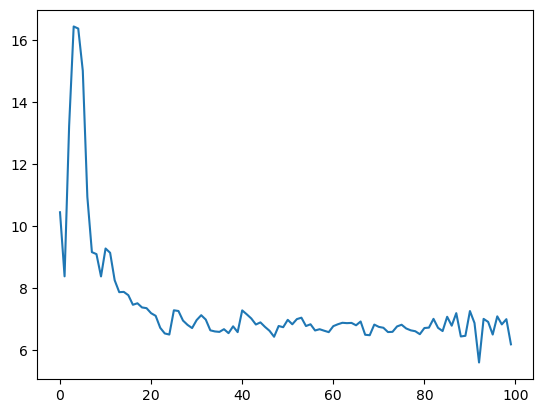

In [66]:
x = list(range(len(loss_list)))
y = loss_list

plt.plot(x,y)

In [67]:
def generate(
    model,
    tokenizer,
    prompt,
    max_new_tokens=3,
    eos_token="[EOS]"
):
    model.eval()

    encoding = tokenizer.encode(prompt)
    input_ids = torch.tensor(encoding.ids).unsqueeze(0)
    attention_mask = torch.tensor(encoding.attention_mask).unsqueeze(0)

    eos_id = tokenizer.token_to_id(eos_token)

    for _ in range(max_new_tokens):
        with torch.no_grad():
            logits = model(input_ids, attention_mask)

        # Get logits for last token
        next_token_logits = logits[0, -1]

        # Greedy choice
        next_token_id = torch.argmax(next_token_logits).item()

        # Stop if EOS
        if next_token_id == eos_id:
            break

        # Append token
        input_ids = torch.cat(
            [input_ids, torch.tensor([[next_token_id]])],
            dim=1
        )
        attention_mask = torch.cat(
            [attention_mask, torch.ones((1, 1), dtype=torch.long)],
            dim=1
        )

    return tokenizer.decode(input_ids[0].tolist())


In [69]:
print(generate(model_one, tokenizer,"Take this"))

Take this s s s
